<a href="https://colab.research.google.com/github/KenPascual/CPE311_Computational-Thinking-with-Python/blob/main/CaseStudy1/CPE311_CaseStudy1_Pascual%2CMoldez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study 1: Solving Real-World Problems Using Computational Thinking

Submitted by: <br>
* Pascual, Ken Leonard
* Moldez, Ericka Sheen

## Instructions:



1.   Choose one real-world problem. Discuss the given scenario or the problem.
2.   Use the provided template to identify the problem then implement decomposition of the problem, abstraction, and solution modeling.
3. Create an algorithm to solve the given problem.
4. Apply applicable techniques to solve the problems (optimization, dynamic programming, or graph)
5. Create a slide presentation of the case study.
6. Createe a folder in your Github repo for the course; the folder must contain your source and pdf of the presentation.


## Problem:

### Bimodal Transit Integration of Bus and Train Systems through Quezon City


*   Organizing public transport systems that pass through Quezon City is crucial in fostering a commuter-friendly experience, which can have great ramifications in solving traffic congestion in the city's roads.
* Notable roads and highways that pass through Quezon City include Commonwealth Avenue, EDSA, and Aurora boulevard.



## for Graphic Organizer

### Iteration 1

Understanding the basics of the problem. We lay the foundations of understanding this problem brick by brick.

#### Problem Identification






We have:
*   5 Bus Transit Routes running through Quezon City
*   2 Railway Transit Lines

#### Decomposition


To break down the problem into subproblems:
*   Identify all bus stops for each bus transit route
*   Identify all stations for each railway transit line
* Determine connections between bus routes and/or train lines to identify transfer points

#### Pattern Recognition

Related solutions to draw on:

*   Bus stops within a bus route are more frequent than train stations within a train line
*   Some bus routes have similar paths to train lines
*   Some train stations are near to bus stops, so transfer points may be present here



#### Abstraction

How to abstract this problem? </br>
Just focus on:
*   Determining the starting point and destination point
*   Determining what bus stops or stations are within reach of your starting point

### Iteration 2

Now that we have identified the components for the problem, we "glue" them together.
This iteration maps the connections between the routes and determines the cost involved in terms of currency and time to analyze time and cost trade-offs

#### Problem Identification

Finding the most favorable route and determining fare between designated points. The favorable route can either:
* use bus routes only
* use train lines only
* use both bus routes and train lines

#### Decomposition

* Identify all possible routes between starting and destination points
* determine which routes require transfers between buses and/or trains
* calculate travel time for each route (inncluding transfer time if applicable)

#### Pattern Recognition

* more stops = longer travel time
* some routes have faster travel time, despite more stops

#### Abstraction

* classifying routes based on whether they use bus only, train only, or both
* determine travel time

### Iteration 3

This part builds the algorithm to solve the problem in an optimal manner

#### Problem Identification

Developing the algorithm to find:
* fastest path


#### Decomposition

Interpret the bimodal transit system as a graph, where:
* nodes = bus stops/train stations
* edges = connections/transfer points
* weights = travel time and fare cost


Implement graph search algorithms to determine shortest path in terms of time or cost


Implement graph search algorithms by weighted scoring for a route that is as fast and as cheap as possible

#### Pattern Recognition

* fastest route may cost more
* cheapest route may take longer
* balanced route is both efficient and cost-effective

#### Abstraction

* represent the bimodal transit network as a graph
* let the user decide if it prefers the:
 * the fastest path

* Use traversal techniques to generate a route based in user preference

## Source code:

In [ ]:
import heapq

def dijkstra(graph, start, end):
    """Finds the shortest path using Dijkstra's algorithm"""
    queue = [(0, start, [])]  # (cost, current station, path)
    visited = set()

    while queue:
        cost, node, path = heapq.heappop(queue)

        if node in visited:
            continue

        visited.add(node)
        path = path + [node]

        if node == end:
            return cost, path

        for neighbor, travel_cost in graph.get(node, {}).items():
            if neighbor not in visited:
                heapq.heappush(queue, (cost + travel_cost, neighbor, path))

    return float("inf"), []  # No path found

# Metro Manila transit network graph (simplified, using estimated fares/time in minutes)
metro_graph = {
    "Monumento": {"Balintawak": 5, "EDSA Carousel": 10},
    "Balintawak": {"Monumento": 5, "Roosevelt": 5},
    "Roosevelt": {"Balintawak": 5, "North Avenue": 8},
    "North Avenue": {"Roosevelt": 8, "Quezon Avenue": 5, "EDSA Carousel": 10},
    "Quezon Avenue": {"North Avenue": 5, "Kamuning": 5},
    "Kamuning": {"Quezon Avenue": 5, "Cubao": 5},
    "Cubao": {"Kamuning": 5, "Santolan": 10, "EDSA Carousel": 12},
    "Santolan": {"Cubao": 10, "Katipunan": 5},
    "Katipunan": {"Santolan": 5, "Anonas": 5},
    "Anonas": {"Katipunan": 5, "EDSA Carousel": 10},
    "EDSA Carousel": {"Monumento": 10, "North Avenue": 10, "Cubao": 12, "Anonas": 10, "Taft Avenue": 15},
    "Taft Avenue": {"EDSA Carousel": 15, "Magallanes": 5},
    "Magallanes": {"Taft Avenue": 5, "Ayala": 5},
    "Ayala": {"Magallanes": 5, "Buendia": 5},
    "Buendia": {"Ayala": 5, "Guadalupe": 5},
    "Guadalupe": {"Buendia": 5, "Boni": 5},
    "Boni": {"Guadalupe": 5, "Shaw Boulevard": 5},
    "Shaw Boulevard": {"Boni": 5, "Ortigas": 5},
    "Ortigas": {"Shaw Boulevard": 5, "Santolan-Annapolis": 5},
    "Santolan-Annapolis": {"Ortigas": 5, "EDSA Taft": 10},
}

# User input
start = input("Enter start station: ")
destination = input("Enter destination station: ")

# Finding the shortest route
cost, path = dijkstra(metro_graph, start, destination)

# Output the results
if path:
    print(f"Shortest route from {start} to {destination}: {' -> '.join(path)} (Time: {cost} mins)")
else:
    print("No route found!")


Enter start station: Monumento
Enter destination station: Ortigas
Shortest route from Monumento to Ortigas: Monumento -> EDSA Carousel -> Taft Avenue -> Magallanes -> Ayala -> Buendia -> Guadalupe -> Boni -> Shaw Boulevard -> Ortigas (Time: 60 mins)


#scratch


In [7]:
graph_mrt3 = {
    "North Avenue": [("Quezon Avenue", 3)],
    "Quezon Avenue": [("North Avenue", 3), ("GMA-Kamuning", 2)],
    "GMA-Kamuning": [("Quezon Avenue", 2), ("Cubao", 2)],
    "Cubao": [("GMA-Kamuning", 2), ("Santolan-Annapolis", 2)],
    "Santolan-Annapolis": [("Cubao", 2), ("Ortigas", 3)],
    "Ortigas": [("Santolan-Annapolis", 3), ("Shaw Boulevard", 2)],
    "Shaw Boulevard": [("Ortigas", 2), ("Boni", 2)],
    "Boni": [("Shaw Boulevard", 2), ("Guadalupe", 3)],
    "Guadalupe": [("Boni", 3), ("Buendia", 2)],
    "Buendia": [("Guadalupe", 2), ("Ayala", 2)],
    "Ayala": [("Buendia", 2), ("Magallanes", 3)],
    "Magallanes": [("Ayala", 3), ("Taft Avenue", 2)],
    "Taft Avenue": [("Magallanes", 2)]
}

graph_lrt2 = {
    "Recto": [("Legarda", 3)],
    "Legarda": [("Recto", 3), ("Pureza", 2)],
    "Pureza": [("Legarda", 2), ("V. Mapa", 2)],
    "V. Mapa": [("Legarda", 2), ("J. Ruiz", 2)],
    "J. Ruiz": [("V. Mapa", 2), ("Gilmore", 3)],
    "Gilmore": [("J. Ruiz", 3), ("Betty Go-Belmonte", 2)],
    "Betty Go-Belmonte": [("Gilmore", 2), ("Araneta-Cubao", 2)],
    "Araneta-Cubao": [("Betty Go-Belmonte", 2), ("Anonas", 3)],
    "Anonas": [("Araneta-Cubao", 3), ("Katipunan", 2)],
    "Katipunan": [("Anonas", 2), ("Santolan", 2)],
    "Santolan": [("Katipunan", 2), ("Marikina-Pasig", 3)],
    "Marikina-Pasig": [("Santolan", 3), ("Antipolo", 2)],
    "Antipolo": [("Marikina-Pasig", 2)]
}

graph_edsabus = {
    "Monumento": [("Bagong Barrio", 3)],
    "Bagong Barrio": [("Monumento", 3), ("Balintawak", 3)],
    "Balintawak": [("Bagong Barrio", 3), ("Kaingin Road", 2)],
    "Kaingin Road": [("Balintawak", 2), ("Roosevelt", 2)],
    "Roosevelt": [("Kaingin Road", 2), ("North Avenue", 3)],
    "North Avenue": [("Roosevelt", 3), ("Quezon Avenue", 2)],
    "Quezon Avenue": [("North Avenue", 2), ("Mega Q-Mart", 2)],
    "Mega Q-Mart": [("Quezon Avenue", 2), ("Main Avenue", 3)],
    "Main Avenue": [("Mega Q-Mart", 3), ("Santolan", 2)],
    "Santolan": [("Main Avenue", 2), ("Ortigas", 2)],
    "Ortigas": [("Santolan", 2), ("Guadalupe", 3)],
    "Guadalupe": [("Ortigas", 3), ("Buendia", 2)],
    "Buendia": [("Guadalupe", 2), ("Ayala", 2)],
    "Ayala": [("Buendia", 2), ("Tramo", 3)],
    "Tramo": [("Ayala", 3), ("Taft Avenue", 2)],
    "Taft Avenue": [("Tramo", 2), ("Roxas Boulevard", 2)],
    "Roxas Boulevard": [("Taft Avenue", 2), ("SM MOA", 2)],
    "SM MOA": [("Roxas Boulevard", 2), ("Macapagal-Bradco Avenue", 2)],
    "Macapagal-Bradco Avenue": [("SM MOA", 2), ("City of Dreams", 2)],
    "City of Dreams": [("Macapagal-Bradco Avenue", 2), ("Ayala Malls Manila Bay", 2)],
    "Ayala Malls Manila Bay": [("City of Dreams", 2), ("PITX Terminal", 2)],
    "PITX Terminal": [("Ayala Malls Manila Bay", 2)]
}

graph_bus5 = {
    "Angat": [("Norzagaray", 3)],
    "Norzagaray": [("Angat", 3), ("Nodado General Hospital", 2)],
    "Nodado General Hospital": [("Norzagaray", 2), ("San Jose del Monte", 2)],
    "San Jose del Monte": [("Nodado General Hospital", 2), ("Francisco Homes", 2)],
    "Francisco Homes": [("San Jose del Monte", 2), ("Gumaoc", 3)],
    "Gumaoc": [("Francisco Homes", 3), ("Grotto", 2)],
    "Grotto": [("Gumaoc", 2), ("SM City SJDM", 2)],
    "SM City SJDM": [("Grotto", 2), ("Malaria", 3)],
    "Malaria": [("SM City SJDM", 3), ("Pangarap", 2)],
    "Pangarap": [("Malaria", 2), ("Amparo", 2)],
    "Amparo": [("Pangarap", 2), ("Lagro", 3)],
    "Lagro": [("Amparo", 3), ("SM Fairview", 2)],
    "SM Fairview": [("Lagro", 2), ("Mindanao Ave", 2)],
    "Mindanao Ave": [("SM Fairview", 2), ("Atherton", 3)],
    "Atherton": [("Mindanao Ave", 3), ("FCM", 2)],
    "FCM": [("Atherton", 2), ("Pearl Drive", 2)],
    "Pearl Drive": [("FCM", 2), ("Litex", 3)],
    "Litex": [("Pearl Drive", 3), ("Manggahan", 2)],
    "Manggahan": [("Litex", 2), ("COA", 2)],
    "COA": [("Manggahan", 2), ("Batasan", 3)],
    "Batasan": [("COA", 3), ("Ever Gotesco", 2)],
    "Ever Gotesco": [("Batasan", 2), ("Diliman Doctors", 2)],
    "Diliman Doctors": [("Ever Gotesco", 2), ("Tandang Sora", 3)],
    "Tandang Sora": [("Diliman Doctors", 3), ("Central Ave", 2)],
    "Central Ave": [("Tandang Sora", 2), ("Technohub", 2)],
    "Technohub": [("Central Ave", 2), ("Philcoa", 3)],
    "Philcoa": [("Technohub", 3), ("LCP", 2)],
    "LCP": [("Philcoa", 2)]
}

graph_bus7 = {
    "Montalban": [("Geronimo", 3)],
    "Geronimo": [("Montalban", 3), ("Montaña", 2)],
    "Montaña": [("Geronimo", 2), ("Maly", 2)],
    "Maly": [("Montaña", 2), ("Dulong Bayan", 3)],
    "Dulong Bayan": [("Maly", 3), ("San Mateo Bayan", 2)],
    "San Mateo Bayan": [("Dulong Bayan", 2), ("San Mateo Doctors Hospital", 2)],
    "San Mateo Doctors Hospital": [("San Mateo Bayan", 2), ("Ampid", 3)],
    "Ampid": [("San Mateo Doctors Hospital", 3), ("Northview", 2)],
    "Northview": [("Ampid", 2), ("Filinvest 2", 2)],
    "Filinvest 2": [("Northview", 2), ("Kasiyahan", 3)],
    "Kasiyahan": [("Filinvest 2", 3), ("Batasan", 2)],
    "Batasan": [("Kasiyahan", 2), ("Ever Gotesco", 2)],
    "Ever Gotesco": [("Batasan", 2), ("Diliman Doctors", 3)],
    "Diliman Doctors": [("Ever Gotesco", 3), ("Tandang Sora", 2)],
    "Tandang Sora": [("Diliman Doctors", 2), ("Central Ave", 2)],
    "Central Ave": [("Tandang Sora", 2), ("Technohub", 3)],
    "Technohub": [("Central Ave", 3), ("Philcoa", 2)],
    "Philcoa": [("Technohub", 2), ("LCP", 2)],
    "LCP": [("Philcoa", 2), ("NKTJ", 3)],
    "NKTJ": [("LCP", 3), ("EAMC", 2)],
    "EAMC": [("NKTJ", 2), ("V.Luna", 2)],
    "V.Luna": [("EAMC", 2)]
}

graph_bus9 = {
    "Cubao": [("15th Avenue", 3)],
    "15th Avenue": [("Cubao", 3), ("Anonas", 3)],
    "Anonas": [("15th Avenue", 3), ("Katipunan", 2)],
    "Katipunan": [("Anonas", 2), ("SM Marikina", 3)],
    "SM Marikina": [("Katipunan", 3), ("Ligaya", 2)],
    "Ligaya": [("SM Marikina", 2), ("Sta. Lucia Grandmall", 2)],
    "Sta. Lucia Grandmall": [("Ligaya", 2), ("Filinvest", 3)],
    "Filinvest": [("Sta. Lucia Grandmall", 3), ("Masinag", 2)],
    "Masinag": [("Filinvest", 2), ("Kingsville", 2)],
    "Kingsville": [("Masinag", 2), ("Xentro Mall", 3)],
    "Xentro Mall": [("Kingsville", 3), ("FUMC", 2)],
    "FUMC": [("Xentro Mall", 2), ("La Montana", 2)],
    "La Montana": [("FUMC", 2), ("Senora Dela Paz", 3)],
    "Senora Dela Paz": [("La Montana", 3), ("Olalia", 2)],
    "Olalia": [("Senora Dela Paz", 2), ("Antipolo", 2)],
    "Antipolo": [("Olalia", 2)]
}

graph_bus11 = {
    "Taytay": [("E.Rod", 3)],
    "E.Rod": [("Taytay", 3), ("Tuazon Ave", 2)],
    "Tuazon Ave": [("E.Rod", 2), ("Sunset", 2)],
    "Sunset": [("Tuazon Ave", 2), ("Brookside", 3)],
    "Brookside": [("Sunset", 3), ("Robinsons Cainta", 2)],
    "Robinsons Cainta": [("Brookside", 2), ("SM East Ortigas", 2)],
    "SM East Ortigas": [("Robinsons Cainta", 2), ("Lucky Gold", 3)],
    "Lucky Gold": [("SM East Ortigas", 3), ("Rosario", 2)],
    "Rosario": [("Lucky Gold", 2), ("C-5 Ortigas", 2)],
    "C-5 Ortigas": [("Rosario", 2), ("Frontera", 3)],
    "Frontera": [("C-5 Ortigas", 3), ("Medical City", 2)],
    "Medical City": [("Frontera", 2), ("Emerald", 2)],
    "Emerald": [("Medical City", 2), ("EDSA Ortigas", 3)],
    "EDSA Ortigas": [("Emerald", 3), ("Columbia", 2)],
    "Columbia": [("EDSA Ortigas", 2), ("Greenhills", 2)],
    "Greenhills": [("Columbia", 2), ("Roosevelt", 3)],
    "Roosevelt": [("Greenhills", 3), ("Bonny Serrano", 2)],
    "Bonny Serrano": [("Roosevelt", 2), ("Gilmore", 2)],
    "Gilmore": [("Bonny Serrano", 2)]
}


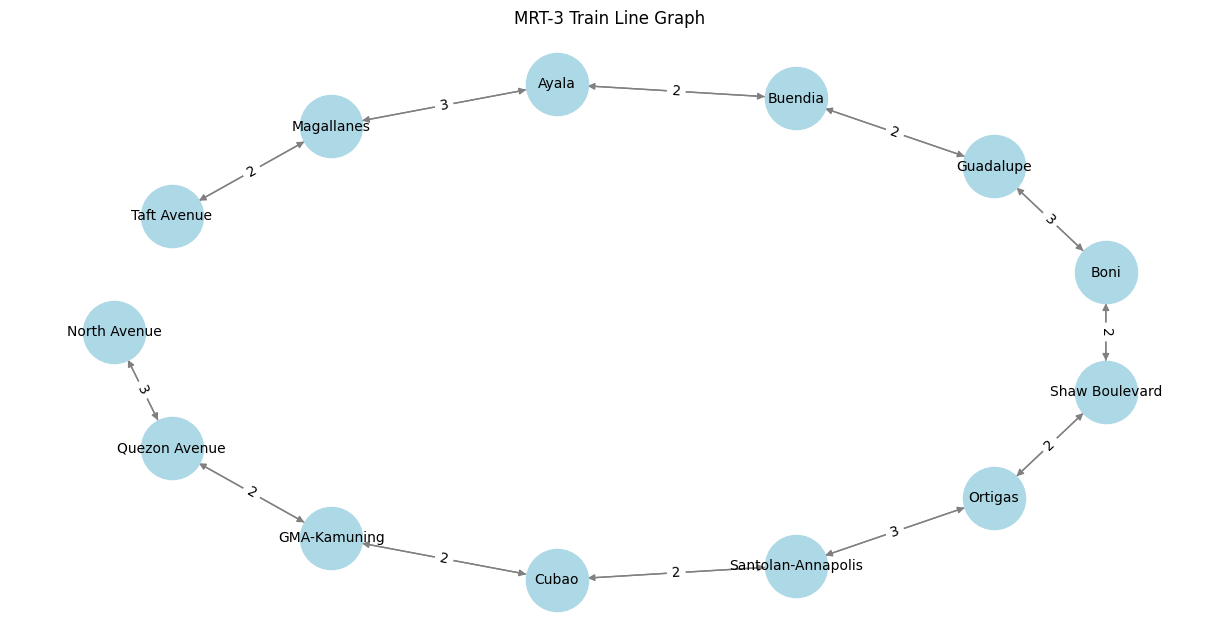

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Add edges with weights
for station, neighbors in graph_mrt3.items():
    for neighbor, weight in neighbors:
        G.add_edge(station, neighbor, weight=weight)

# Draw the graph
plt.figure(figsize=(12, 6))
pos = nx.shell_layout(G)  # Alternative: nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)})

plt.title("MRT-3 Train Line Graph")
plt.show()



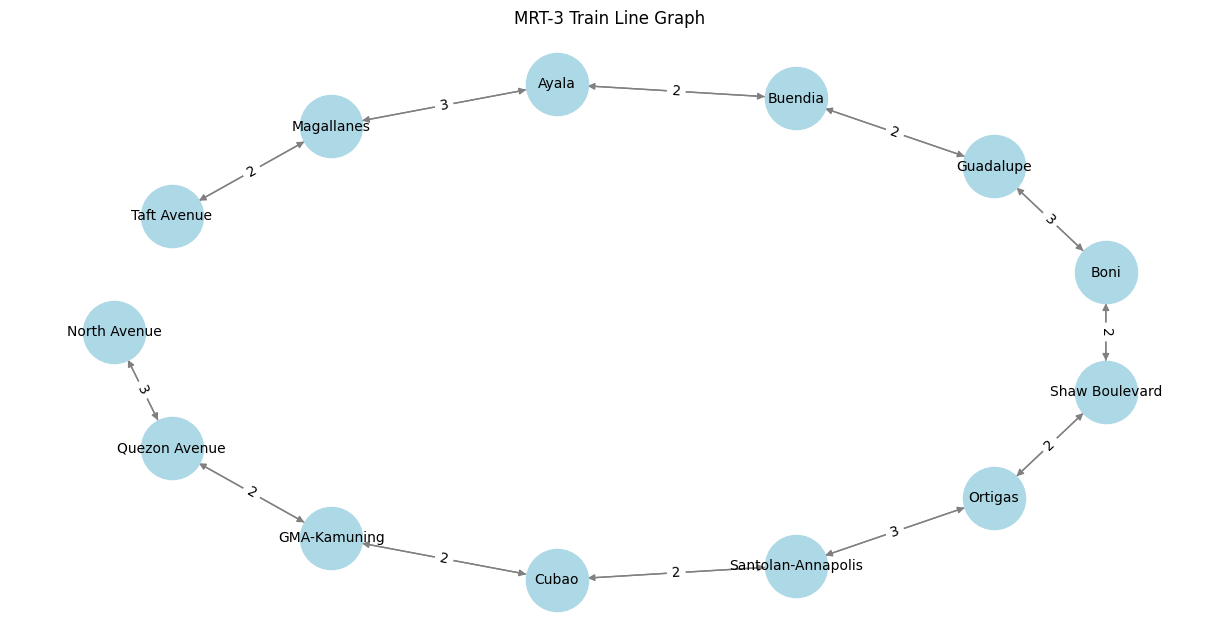

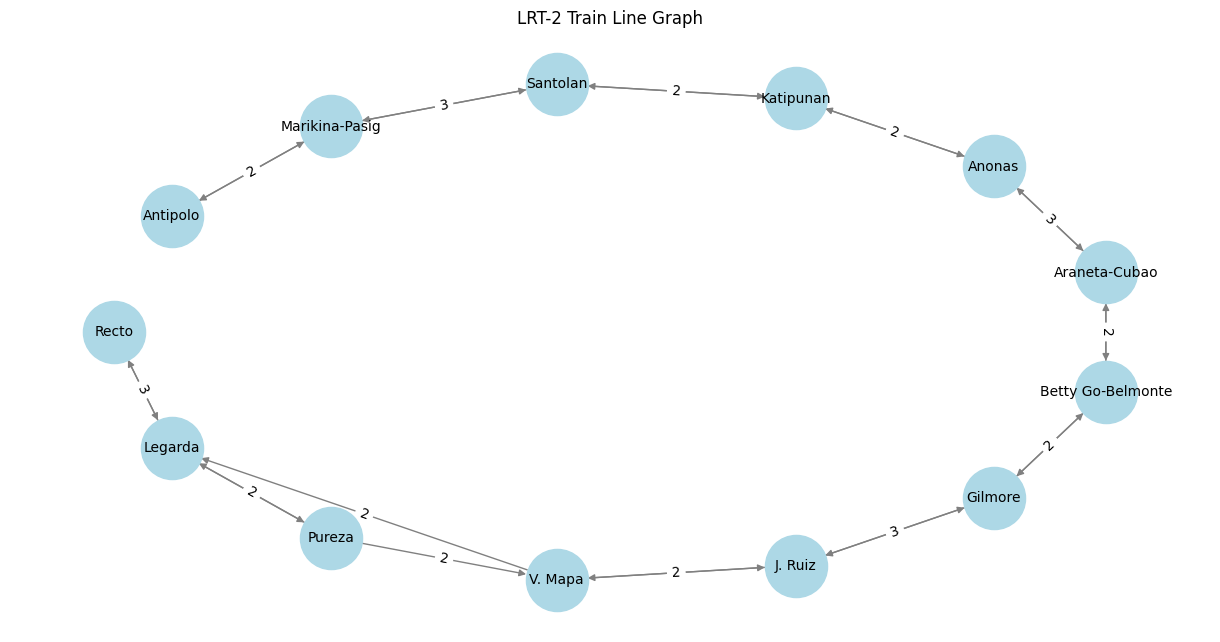

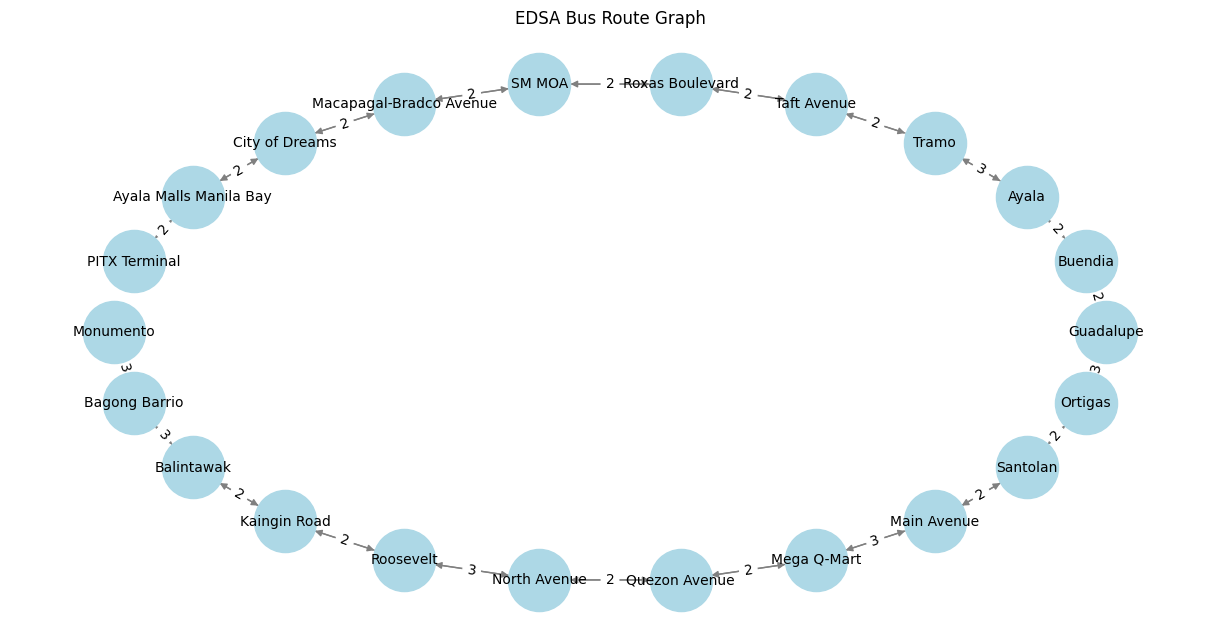

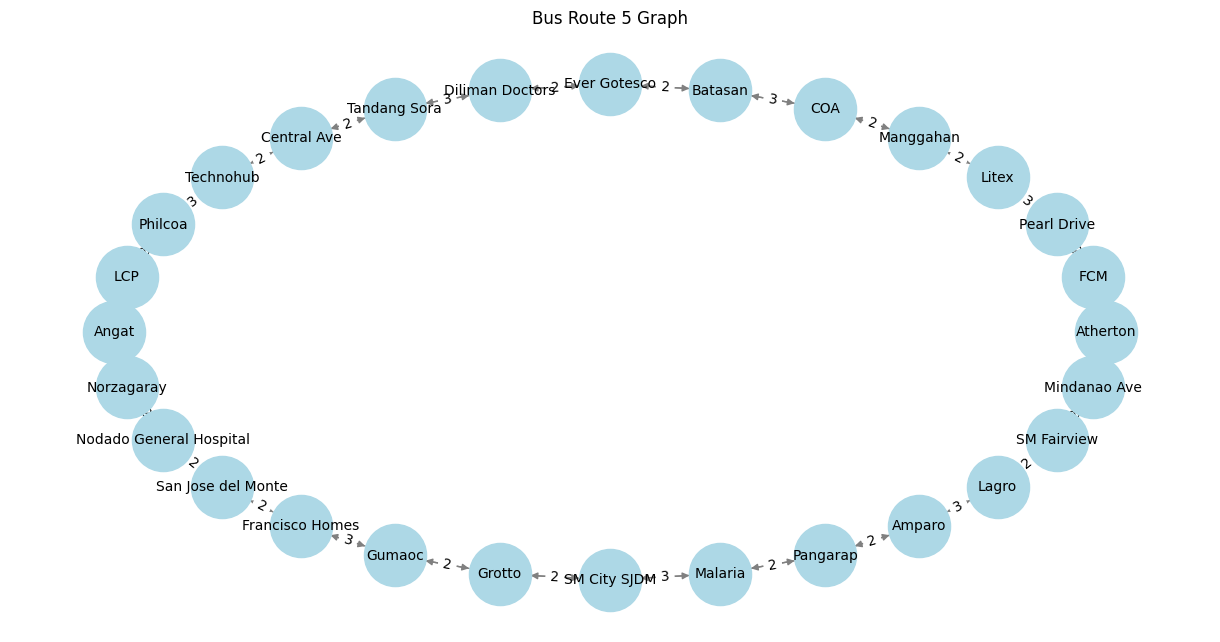

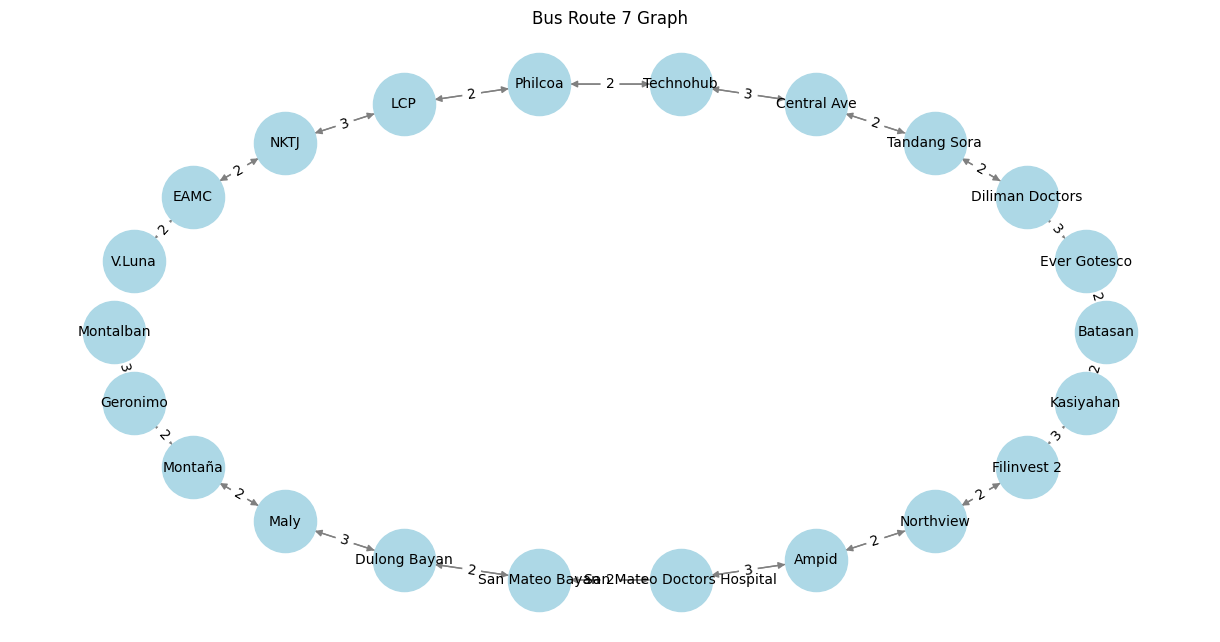

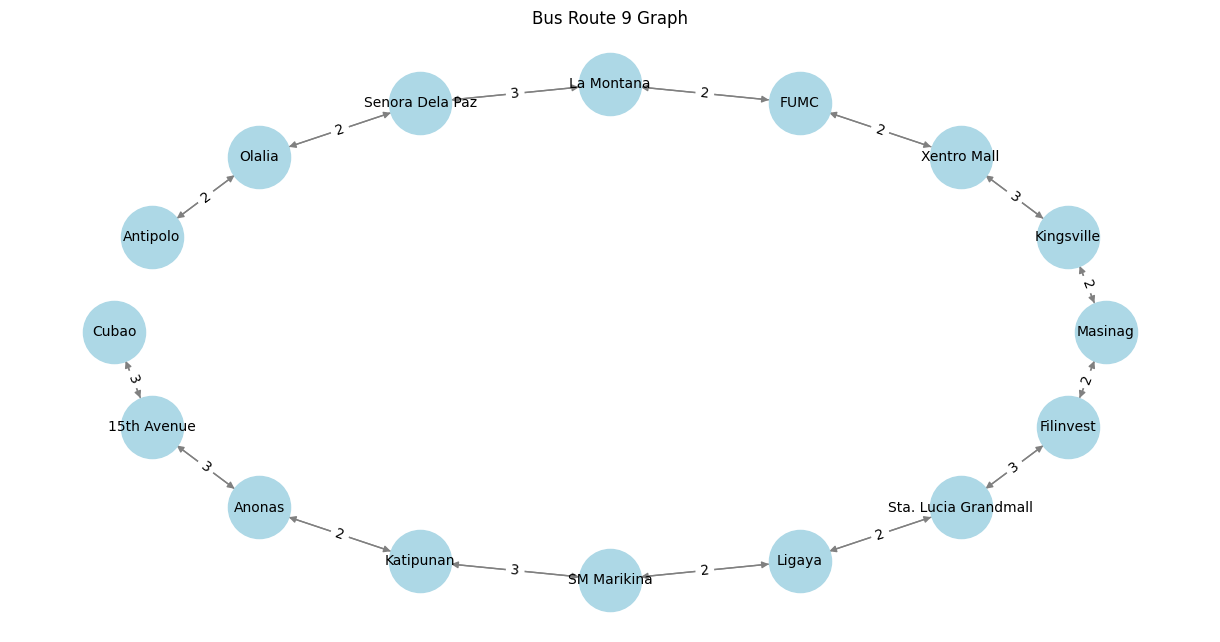

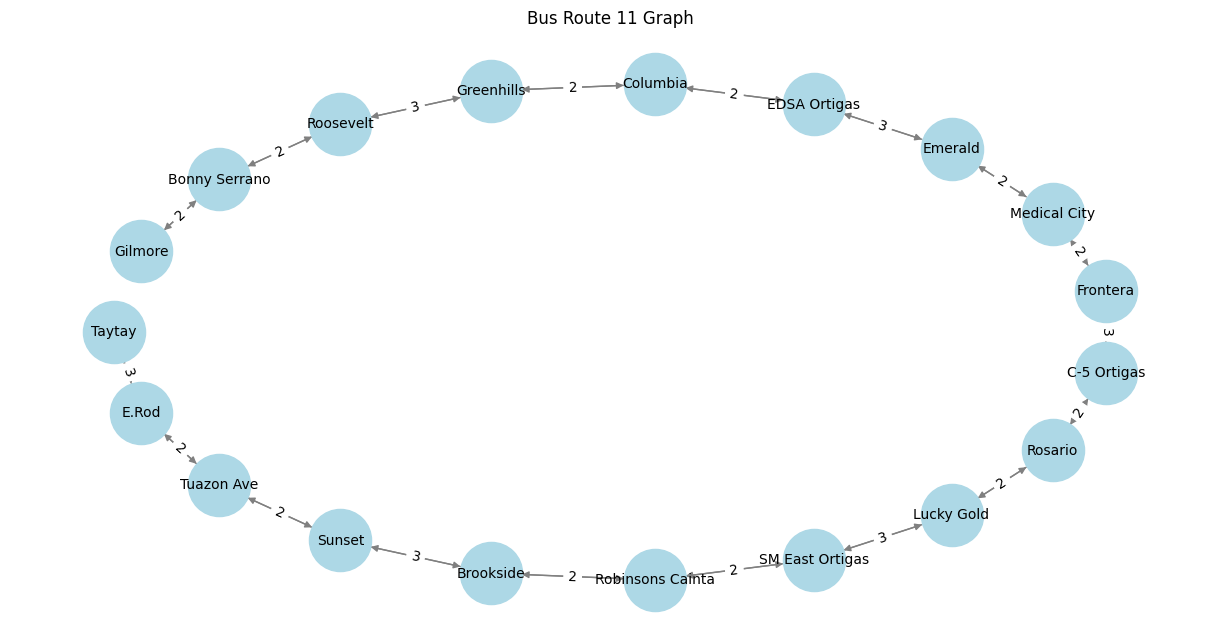

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_graph(graph, title, layout=nx.shell_layout):
    G = nx.DiGraph()

    for station, neighbors in graph.items():
        for neighbor, weight in neighbors:
            G.add_edge(station, neighbor, weight=weight)

    plt.figure(figsize=(12, 6))
    pos = layout(G)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)})

    plt.title(title)
    plt.show()

# Graph data
graphs = {
    "MRT-3 Train Line Graph": graph_mrt3,
    "LRT-2 Train Line Graph": graph_lrt2,
    "EDSA Bus Route Graph": graph_edsabus,
    "Bus Route 5 Graph": graph_bus5,
    "Bus Route 7 Graph": graph_bus7,
    "Bus Route 9 Graph": graph_bus9,
    "Bus Route 11 Graph": graph_bus11
}

# Plot all graphs
for title, graph in graphs.items():
    plot_graph(graph, title)
